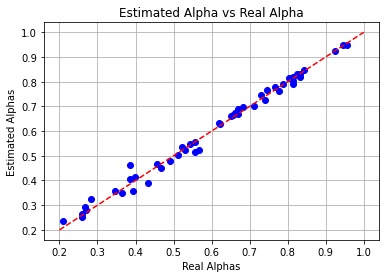

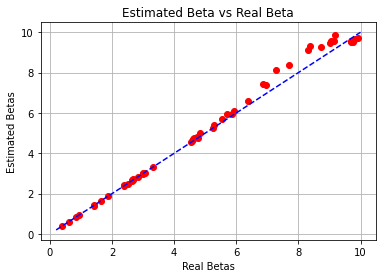

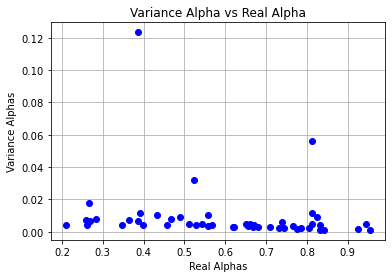

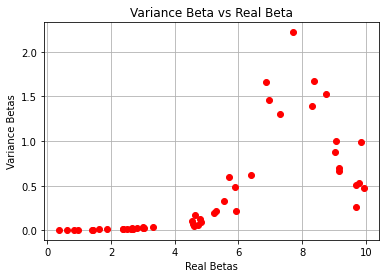

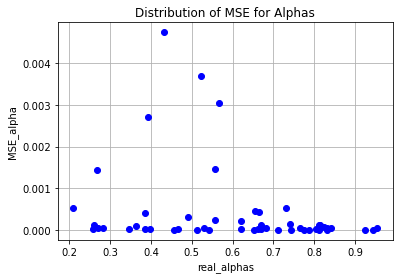

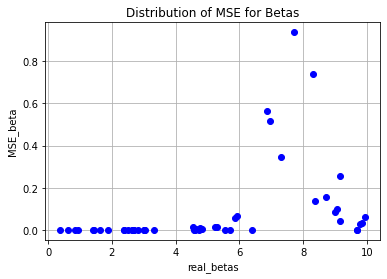

In [1]:
from NewOOP import Runs, Simulation
import numpy as np
import matplotlib.pyplot as plt

def recovery_simulation(real_alpha, real_beta, Num_trials=1000, num_est=50):
    # 1. Simulate data using known parameters
    sim = Simulation(Num_trials)
    states, actions, R, _ = sim.generate_states_actions_rewards(real_alpha, real_beta)
    
    # 2. Estimate parameters from the simulated data
    runs_simulation = Runs(Num_trials, 1, num_est)  # One mouse, 50 estimates
    alpha_estimates, beta_estimates = runs_simulation.estimate_alphas_betas([real_alpha], [real_beta])
    
    # 3. Extract the estimates
    estimated_alpha = np.mean(alpha_estimates[0])
    estimated_beta = np.mean(beta_estimates[0])
    var_alpha = np.var(alpha_estimates[0])
    var_beta = np.var(beta_estimates[0])
    return estimated_alpha, estimated_beta, var_alpha, var_beta

# Generate a set of known alphas and betas
num_mice = 50
real_alphas = np.random.uniform(0.2, 1, num_mice)
real_betas = np.random.uniform(0.2, 10, num_mice)

estimated_alphas = []
estimated_betas = []

for i in range(num_mice):
    est_alpha, est_beta, _, _ = recovery_simulation(real_alphas[i], real_betas[i])
    estimated_alphas.append(est_alpha)
    estimated_betas.append(est_beta)

# Plotting the estimated alphas against known alphas
plt.figure()
plt.plot(real_alphas, estimated_alphas, 'bo')
plt.plot([0.2, 1], [0.2, 1], 'r--')  # ideal line
plt.xlabel('Real Alphas')
plt.ylabel('Estimated Alphas')
plt.title('Estimated Alpha vs Real Alpha')
plt.grid(True)
plt.show()

# Plotting the estimated betas against known betas
plt.figure()
plt.plot(real_betas, estimated_betas, 'ro')
plt.plot([0.2, 10], [0.2, 10], 'b--')  # ideal line
plt.xlabel('Real Betas')
plt.ylabel('Estimated Betas')
plt.title('Estimated Beta vs Real Beta')
plt.grid(True)
plt.show()

var_alphas = []
var_betas = []

for i in range(num_mice):
    _, _, var_alpha, var_beta = recovery_simulation(real_alphas[i], real_betas[i])
    var_alphas.append(var_alpha)
    var_betas.append(var_beta)

# Plotting the estimated alphas against real alphas
plt.figure()
plt.plot(real_alphas, var_alphas, 'bo')
plt.xlabel('Real Alphas')
plt.ylabel('Variance Alphas')
plt.title('Variance Alpha vs Real Alpha')
plt.grid(True)
plt.show()

# Plotting the estimated betas against real betas
plt.figure()
plt.plot(real_betas, var_betas, 'ro')
plt.xlabel('Real Betas')
plt.ylabel('Variance Betas')
plt.title('Variance Beta vs Real Beta')
plt.grid(True)
plt.show()


# Compute Mean Square Error
def compute_mse(predicted, true):
    return np.mean((np.array(predicted) - np.array(true)) ** 2)

mse_alphas = []
mse_betas = []

for i in range(num_mice):
    est_alpha, est_beta, _, _ = recovery_simulation(real_alphas[i], real_betas[i])
    
    mse_alpha_i = compute_mse([est_alpha], [real_alphas[i]])
    mse_beta_i = compute_mse([est_beta], [real_betas[i]])
    
    mse_alphas.append(mse_alpha_i)
    mse_betas.append(mse_beta_i)


plt.figure()
plt.plot(real_alphas, mse_alphas, 'bo')
plt.xlabel('real_alphas')
plt.ylabel('MSE_alpha')
plt.title('Distribution of MSE for Alphas')
plt.grid(True)
plt.show()


plt.figure()
plt.plot(real_betas, mse_betas, 'bo')
plt.xlabel('real_betas')
plt.ylabel('MSE_beta')
plt.title('Distribution of MSE for Betas')
plt.grid(True)
plt.show()










 